In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('train.csv')

In [18]:
data = np.array(data)

In [19]:
m, n = data.shape
np.random.shuffle(data)

In [20]:
data_dev = data[0:1000].T 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. # Each pixel has a value ranging from 0 (totally white) to 255 (totally black), dividing by 255 will make the range go from 0 to 1

In [21]:
data_train = data[1000:m].T # Turning each pixel in a row and each column in a sample.
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255. # doing "255." instead of "255" ensures that the resulting array elements are fully converted in floats (otherwise the accuracy of the model would be lower)
_,m_train = X_train.shape

## Functions

In [22]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # random array of values -0.5 to 0.5 in the shape 10x784
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

## Playing arround with the functions

In [28]:
W1, b1, W2, b2 = init_params()

print(W1.shape) #Each connection between neurons from different layers has one different weight (10 neurons in the 2nd layer, and 784 in the first one)
print(b1.shape) #Each neuron has only one bias, b1 is the matrix of biases of the second layer (10 neurons)
print(W2.shape)
print(b2.shape)


(10, 784)
(10, 1)
(10, 10)
(10, 1)


## Excecuting the algorithm and making predictions

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[2 1 7 ... 9 7 6] [5 1 1 ... 7 1 3]
0.13507317073170733
Iteration:  10
[2 1 7 ... 8 1 6] [5 1 1 ... 7 1 3]
0.21739024390243902
Iteration:  20
[2 1 7 ... 8 1 6] [5 1 1 ... 7 1 3]
0.31321951219512195
Iteration:  30
[2 1 1 ... 7 1 6] [5 1 1 ... 7 1 3]
0.36790243902439024
Iteration:  40
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.4103170731707317
Iteration:  50
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.44990243902439025
Iteration:  60
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.48621951219512194
Iteration:  70
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.5175853658536586
Iteration:  80
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.5468048780487805
Iteration:  90
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.5741463414634146
Iteration:  100
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.6010731707317073
Iteration:  110
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.6271219512195122
Iteration:  120
[2 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.6505121951219512
Iteration:  130
[8 1 1 ... 7 1 1] [5 1 1 ... 7 1 3]
0.6730975609756098
Iteration: 

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


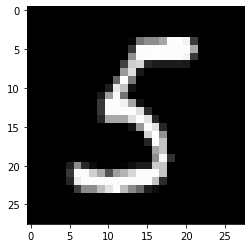

Prediction:  [1]
Label:  1


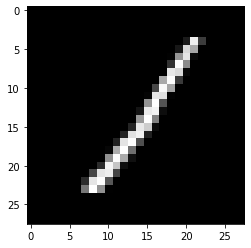

Prediction:  [1]
Label:  1


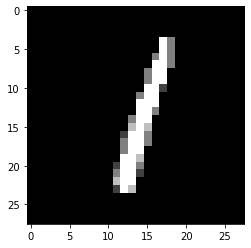

Prediction:  [4]
Label:  4


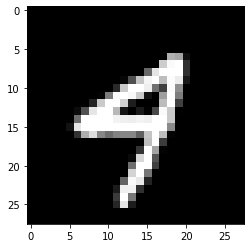

In [26]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

## Acurracy on the dev set

In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 0 3 0 6 4 9 0 7 1 1 1 3 7 8 5 5 7 7 9 5 7 6 3 1 7 7 6 5 3 0 0 4 8 2 8 1
 2 5 2 2 4 0 1 5 7 6 7 1 0 1 0 6 5 6 9 6 6 7 1 7 3 8 7 5 2 0 4 8 9 4 7 1 3
 6 1 2 7 5 7 2 2 6 4 8 3 2 6 2 3 6 2 7 5 6 4 4 2 4 2 8 7 5 0 9 2 6 1 9 0 7
 1 4 3 0 5 3 3 4 4 9 1 2 0 8 8 9 6 1 0 3 3 2 1 3 4 6 3 4 9 3 2 3 9 9 9 7 6
 1 1 9 1 7 9 8 0 5 9 1 7 9 7 4 9 4 5 9 9 9 0 9 1 8 1 2 2 9 3 2 1 7 0 8 0 5
 1 9 5 1 8 0 3 4 2 3 5 6 1 5 2 3 8 5 8 1 2 9 0 7 4 7 3 7 7 0 0 2 0 5 6 5 3
 7 8 9 9 0 7 2 3 2 2 8 8 3 7 2 7 3 3 2 6 8 4 2 3 9 9 1 1 8 3 7 4 8 1 9 4 8
 9 5 2 0 8 0 6 3 9 8 1 1 7 5 6 4 6 0 4 5 6 2 9 5 8 5 5 4 9 0 0 9 6 9 6 2 3
 2 9 8 6 9 2 0 9 9 3 7 5 8 9 3 9 9 7 6 1 0 1 7 8 0 7 2 3 7 2 7 3 9 4 9 0 4
 5 4 9 9 4 4 0 0 7 7 3 9 7 5 7 9 2 7 2 6 0 2 9 2 0 5 7 6 2 7 3 9 3 7 1 0 9
 5 6 6 8 6 6 9 1 4 8 4 2 1 3 0 1 4 6 8 4 1 3 2 9 9 4 7 8 5 0 6 0 0 8 1 3 9
 6 2 7 9 9 4 0 9 1 9 5 1 8 0 7 0 6 0 2 9 4 2 1 9 9 6 1 8 8 4 7 7 9 1 3 0 0
 8 6 3 2 2 6 9 1 5 1 1 8 0 6 9 7 2 7 7 4 9 0 4 5 5 2 6 0 2 9 3 7 5 1 0 1 6
 3 4 6 9 2 8 4 2 9 3 8 3 

0.838